This is a collection of highlights and comments for Chapter 4 of PRML book. page numbers are probably based on first printing of the book. (I only have a PDF version of the book's (possibly) first printing).

## 4.0

#### pp. 180

> The decision surfaces correspond to y(x) = constant, so that $w^T x + w_0 = \textrm{constant}$ and hence the decision surfaces are linear functions of $x$, even if the function $f(\cdot)$ is nonlinear.

Essentially, there are 3 ways of doing classification.

1. Section **4.1** some discriminant function, without probabilistic interpretation
2. Section **4.2** generative model
3. Section **4.3** discriminative model

## 4.1 Discriminant Functions

### 4.1.3 Least squares for classification

#### pp. 185

> However, this summation constraint alone is not sufficient to allow the model outputs to be interpreted as probabilities because they are not constrained to lie within the interval $(0, 1)$

This is one reason why least squares doesn't make sense for classification. I remember in Andrew Ng's Machine Learning Coursera course, there's another way to show why this is wrong. Also, after this sentence, the author gives another example why this doesn't make sense.

### 4.1.5 Relation to least squares

I think in some other references, there's a probabilistic (actually Gaussian) interpretation of Fisher's linear discriminant. It should be same as least squares in some sense.

### 4.1.6 Fisher's discriminant for multiple classes

I don't like the objective function Eq. (4.50) here. I think easiest way to think about it is sum of many Eq. (4.26), and requiring all different $w$ to be orthogonal. Then it should be easy to derive that they must be eigenvectors of that generalized eigenvalue problem.

NOTICE THAT actually this multi class definition of LDA is not equivalent to two class, when number of classes is 2. The definition of $S_B$ (Eq. (4.27) vs. Eq. (4.46)) are different. I would say the one for multiple classes is more correct, as that takes number of data points in each class into account.

Another aside: the reason that $S_B$ has rank at most $C-1$ can be found in my special notes for linear algebra.

In [1]:
# notice that in sklearn, there are multiple ways to compute dim reduction orientations for LDA.
# Let's see if they are equivalent.

# turns out they are totally inconsistent...... Even classification coefficients are inconsistent as well.
# check <https://github.com/scikit-learn/scikit-learn/issues/8212>
# <https://github.com/scikit-learn/scikit-learn/issues/1649>
# also relevant might be <https://github.com/scikit-learn/scikit-learn/issues/3500>

In [2]:
import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
rng_state = np.random.RandomState(seed=0)
print(sklearn.__version__)
# let's say 1000 sample, 10 dim, and 4 classes
X = rng_state.randn(1000, 5)*np.array([1,11,20,4,20])
y = rng_state.randint(0, 2, size=(1000,))
clf_1 = LinearDiscriminantAnalysis(solver="svd")
clf_1 = clf_1.fit(X, y)
clf_2 = LinearDiscriminantAnalysis(solver="eigen")
clf_2 = clf_2.fit(X, y)
clf_3 = LinearDiscriminantAnalysis(solver="lsqr")
clf_3 = clf_3.fit(X, y)

print(clf_1.coef_-clf_2.coef_,clf_1.coef_-clf_3.coef_)
print(clf_1.intercept_-clf_2.intercept_,clf_1.intercept_-clf_3.intercept_)

0.18
[[ 0.30953158 -0.05400618  0.01572382  0.13094748 -0.02656968]] [[  7.67230451e-05  -1.33864168e-05   3.89743481e-06   3.24577203e-05
   -6.58578056e-06]]
[ 0.05393478] [  1.33687182e-05]


In [3]:
# multiple classes. still wrong. Actually, I don't know how "lsqr" can handle multiple classes, based on description in PRML.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
rng_state = np.random.RandomState(seed=0)
# let's say 1000 sample, 10 dim, and 4 classes
X = rng_state.randn(1000, 5)*np.array([1,11,20,4,20])
y = rng_state.randint(0, 3, size=(1000,))
clf_1 = LinearDiscriminantAnalysis(solver="svd")
clf_1 = clf_1.fit(X, y)
clf_2 = LinearDiscriminantAnalysis(solver="eigen")
clf_2 = clf_2.fit(X, y)
clf_3 = LinearDiscriminantAnalysis(solver="lsqr")
clf_3 = clf_3.fit(X, y)

print(clf_1.coef_-clf_2.coef_,clf_1.coef_-clf_3.coef_)  # worse, none of the them are the same.
print(clf_1.intercept_-clf_2.intercept_,clf_1.intercept_-clf_3.intercept_)

[[ 0.1934731  -0.02564193 -0.01294817  0.0298834   0.03069991]
 [-0.16178308  0.0210096   0.02115291  0.0386057   0.03357963]
 [ 0.35275702 -0.03953119 -0.02055565  0.02959616  0.03000766]] [[ 0.06391493 -0.0035762   0.0008785   0.0043834   0.00027548]
 [ 0.06384208 -0.00354351  0.00091077  0.00439711  0.00027804]
 [ 0.06432018 -0.00359062  0.00088201  0.00439345  0.0002755 ]]
[ 0.01861233  0.04655291  0.04982325] [ 0.002999    0.00302984  0.00304358]


1.00523626355 0.997227631596


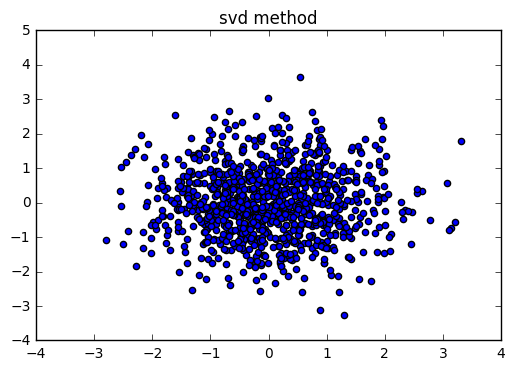

21.3360768079 93.6128227564


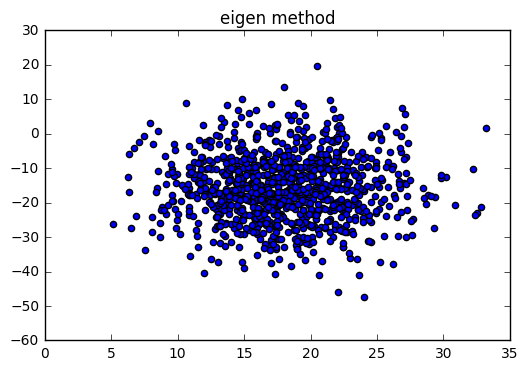

In [4]:
# it seems that `svd` gives a normalized version of transformed data,
# since there's some scaling inside the fitting method.
# Still I don't like this. this is not explicit in the API of LDA class.

%matplotlib inline
import matplotlib.pyplot as plt

rng_state = np.random.RandomState(seed=0)
# let's say 1000 sample, 10 dim, and 4 classes
X = rng_state.randn(1000, 5)*np.array([1,11,20,4,20]) + np.array([10, 100, 2, 0, 1])
y = rng_state.randint(0, 4, size=(1000,))
clf_1 = LinearDiscriminantAnalysis(solver="svd", n_components=2)
clf_1 = clf_1.fit(X, y)
clf_2 = LinearDiscriminantAnalysis(solver="eigen", n_components=2)
clf_2 = clf_2.fit(X, y)
X_transformed_1 = clf_1.transform(X)
X_transformed_2 = clf_2.transform(X)

plt.close('all')
plt.scatter(X_transformed_1[:,0],X_transformed_1[:,1])
plt.title('svd method')
print(X_transformed_1[:,0].var(), X_transformed_1[:,1].var())
plt.show()

plt.close('all')
plt.scatter(X_transformed_2[:,0],X_transformed_2[:,1])
plt.title('eigen method')
print(X_transformed_2[:,0].var(), X_transformed_2[:,1].var())
plt.show()

## 4.2 Probabilistic Generative Models

#### pp. 197, Figure 4.9

according to errata, "probit function" should be "inverse probit function".

### 4.2.4 Exponential family

Here it establishes why we always use logistic sigmoid when using discriminative model. Check errata, as there are some mistakes in the equations.

## 4.3 Probabilistic Discriminative Models

#### pp. 204

> One advantage of the discriminative approach is that there will typically be fewer adaptive parameters to be determined, as we shall see shortly. It may also lead to improved predictive performance, particularly when the class-conditional density assumptions give a poor approximation to the true distributions.

The advantage in terms of number of parameters is discussed in 4.3.2.

### 4.3.3 Iterative reweighted least squares

Essentially newton's method on GLM.

#### pp. 208

> We see that the update formula (4.99) takes the form of a set of normal equations for a weighted least-squares problem

See <https://en.wikipedia.org/wiki/Linear_least_squares_(mathematics)#Weighted_linear_least_squares> for why Eq. (4.99) is weighted least-squares.

> In fact, we can interpret IRLS as the solution to a linearized problem in the space of the variable $a = w^T\phi$.

I don't think this interpretation is very easy to understand. Seems that 

1. $a$ is a function of $y$, that is, $a=\sigma^{-1}(y)$.
2. however, we need to use $w^T \phi$ to achieve the optimal $a$.

Thus, in (4.103), it represents $a(y)$ as a Taylor expansion around the $y_n$ that gives $a(y_n)=a_n(w^{\textrm{old}})$. Then use $t_n - y_n$ as delta to compute the approximately ideal $a$ we want to achieve. Then plus weighting by $R$, we formulate (4.99) as a reweighted least square problem, of many $w^T \phi_n = z_n$, where $z_n$ is the approximately ideal $w^T \phi_n$ we want to achieve.

### 4.3.5 Probit regression

#### pp. 212

> The effect of mislabelling is easily incorporated into a probabilistic model by introducing a probability $\eta$ that the target value $t$ has been flipped to the wrong value.

I think this trick has appeared in many homeworks...

### 4.3.6 Canonical link functions

1. That scale varaible is just tradition in statistics, and here it doesn't interfere with derivation.
2. The activation function and link function establishes the bijection between mean parameters and canonical parameters. Here mean is the mean of this scalar sufficient statistics. Check my special notes on exponential family.
3. While here the derivation only applies to scalar, it in theories applies to higher dimensionality. Otherwise, the nice gradient we obtained for softmax won't hold.
4. There are some subtleties, such as redundant representation of softmax. In this case, this derivation won't work, as there's no bijection between mean and canonical parameters. See "Properties of softmax regression parameterization" in <http://ufldl.stanford.edu/tutorial/supervised/SoftmaxRegression/>. But seems that we still have the nice gradient, **maybe by luck**?

## 4.4 The Laplace Approximation

#### pp. 216

> As a result of the central limit theorem, the posterior distribution for a model is expected to become increasingly better approximated by a Gaussian as the number of observed data points is increased, and so we would expect the Laplace approximation to be most useful in situations where the number of data points is relatively large.

I don't think CLT applies here at all.

> The most serious limitation of the Laplace framework, however, is that it is based purely on the aspects of the true distribution at a specific value of the variable, and so can fail to capture important global properties.

### 4.4.1 Model comparison and BIC

I don't think BIC, or Bayesian based model comparison in general, is useful in practice.

## 4.5 Bayesian Logistic Regression

Later on, in Chapter 10, some of these techniques can be derived in a more rigorous way.

### 4.5.1 Laplace approximation

This section talks about how to approximately get posterior distribution.

### 4.5.2 Predictive distribution

#### pp. 219

> We can evaluate $p(a)$ by noting that the delta function imposes a linear constraint on $w$ and so forms a marginal distribution from the joint distribution $q(w)$ by integrating out all directions orthogonal to $\phi$. Because $q(w)$ is Gaussian, we know from Section 2.3.2 that the marginal distribution will also be Gaussian.

essentially, here, $w$ can be represented as $x*\phi$ (w.l.o.g. assuming $\phi$ is unit length), plus all linear combinations of directions orthogonal to $\phi$. That is, we build a coordinate system where $\phi$ is one of the canonical axes. If this is the case, it should be easy to see, for each particular $a$, $p(a)$ equals marginalization over those orthogonal directions. So implicitly, we know it's Gaussian, but to evaluate it, we do it in directly by computing mean and variance.

One tricky case is when $\phi$ is zero vector. In that case, the final result Eq. (4.151) seems to still hold.

> The advantage of using a probit function is that its convolution with a Gaussian can be expressed analytically in terms of another probit function.

this is only place why (inverse) probit is introduced? Sad…

